# Bonus: Test with your own pet (15 pts)

In this bonus question, you are going to test your model on some real photos of cats and dogs around. 

If you are a cat or dog owner, or if there are some cats and dogs around where you live/work; take some photos. If you are not able to take cat and dog photos, check the Instagram account of "ODTÜ Hayvan Dostları" and download/screenshot some cat and dog photos.

https://www.instagram.com/odtuhaydost/

You should have a dataset of at least 5 cat and 5 dog photos to start.


You can use or copy-paste anything you have written in Question 3.


## Load model
Load the trained network you trained and saved in Question 3.


In [1]:
import torch, torchvision
import numpy as np
import matplotlib.pyplot as plt

class ConvNet(torch.nn.Module):
    def __init__(self):
        super().__init__() #don't remove this line
        self.layers = torch.nn.Sequential(
            # CT: In the picture above:
            # -the kernel Size for Conv2d is (5,5)
            # -the kernel size for MaxPool2d is (3,3)
            # So we add these parameters in addition to given parameters in guideline.
            torch.nn.Conv2d(in_channels=3, out_channels=16, kernel_size=(5,5), stride=1), # CT: 96x96x16
            torch.nn.MaxPool2d(kernel_size=(3,3), stride=3), # CT: 32x32x16
            torch.nn.BatchNorm2d(num_features=16),# CT: It brings all the weight in the same scale to prevent vanishing/exploiding gradient
            torch.nn.ReLU(),        
            #layer2
            torch.nn.Conv2d(in_channels=16, out_channels=32, kernel_size=(5,5), stride=1), # CT: 28x28x32
            torch.nn.MaxPool2d(kernel_size=(3,3), stride=3), #
            torch.nn.BatchNorm2d(num_features=32),
            torch.nn.Dropout2d(p=0.1), # CT: In training process, it prevents overfiting. How? Randomly zeros some of the elements. P is the prob of the zero-element
            torch.nn.ReLU(),
            #layer3
            torch.nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(5,5), stride=1), # CT:5x5x32
            torch.nn.MaxPool2d(kernel_size=(3,3), stride=3), # CT: 1x1x32
            torch.nn.BatchNorm2d(num_features=32),
            torch.nn.Flatten(),
            torch.nn.Linear(32,16),
            torch.nn.Linear(16,2),
            #torch.nn.LogSoftmax(dim=1) # CT: Loss function handle this layer.
            
        )

        
    def forward(self, x):
        return self.layers(x)
    
    
# Helper for visualization
def torch_imshow(img):
    img = img.permute(1,2,0)
    plt.imshow(img.cpu().numpy())
    plt.show()    
    
def check_accuracy(neuralnet, dataloader):
    neuralnet.eval() 
    num_correct_predictions   = 0
    num_incorrect_predictions = 0
    
    for imgs_batch, labels_batch in dataloader: 
        # because batch size=1 for this part we are free to add some code in here:
        torch_imshow(imgs_batch[0])
        print(f'True Label: {labels_batch}')
        
        # Load batches to GPU
        imgs_batch, labels_batch = imgs_batch.to("cuda"), labels_batch.to("cuda")
        
        
        with torch.no_grad():
            predictions_batch=neuralnet(imgs_batch).argmax(dim=1)
        print(f'Predicted Label: {predictions_batch}')
        
        
        
        
        num_correct_predictions_batch   = torch.sum(predictions_batch == labels_batch)
        num_incorrect_predictions_batch = torch.sum(predictions_batch != labels_batch)
        
        num_correct_predictions   += num_correct_predictions_batch.item()
        num_incorrect_predictions += num_incorrect_predictions_batch.item()
    
    accuracy = num_correct_predictions / (num_correct_predictions + num_incorrect_predictions)
    
    
    ## Toggle eval mode off to turn back to training mode
    neuralnet.eval()
    
    return accuracy

In [2]:
ct=torch.load('/home/cagnur/Desktop/DL/A2/Assignment2/Q3.pt')

## Prepare & Create Dataset
Prepare the dataset using the same folder structure from cats/dogs dataset and ImageFolder utility of torchvision. 

Make sure you created another folder for your dataset with the same folder structure.

In [3]:
import os
dataset_path = '/home/cagnur/Desktop/DL/A2/Assignment2/cats_dogs_bonus/'
test_set_path = os.path.join(dataset_path, 'test_set')

test_transforms = torchvision.transforms.Compose([ # CT: We can apply data augmentation. However, the main goal is training the model so we dont need to apply for validation and test dataset
    torchvision.transforms.Resize((100,100)),  # CT: Standardize the input / Data pre-processing
    torchvision.transforms.ToTensor() # CT: Standardize the input / Data pre-processing
])
test_dataset = torchvision.datasets.ImageFolder(root=test_set_path, transform=test_transforms)

## Create Dataloader
Create a dataloader with batch size 1

In [4]:
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=1, shuffle=False)

## Test your trained model on your dataset 
Find the accuracy of trained model on your dataset. Also, visualize all predictions (as probabilities) of your model with the images.


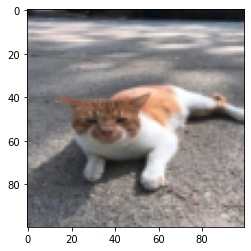

True Label: tensor([0])
Predicted Label: tensor([1], device='cuda:0')


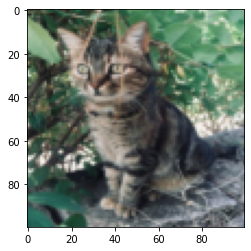

True Label: tensor([0])
Predicted Label: tensor([0], device='cuda:0')


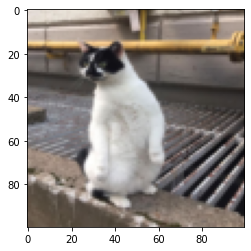

True Label: tensor([0])
Predicted Label: tensor([0], device='cuda:0')


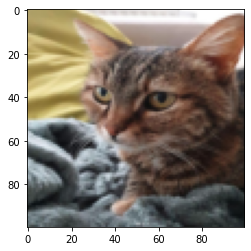

True Label: tensor([0])
Predicted Label: tensor([0], device='cuda:0')


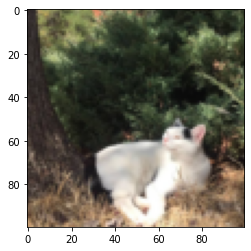

True Label: tensor([0])
Predicted Label: tensor([0], device='cuda:0')


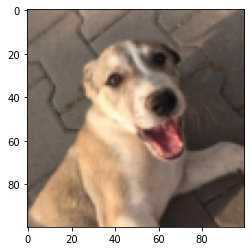

True Label: tensor([1])
Predicted Label: tensor([1], device='cuda:0')


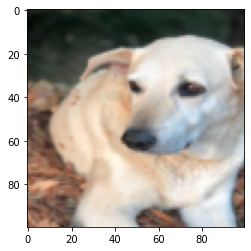

True Label: tensor([1])
Predicted Label: tensor([1], device='cuda:0')


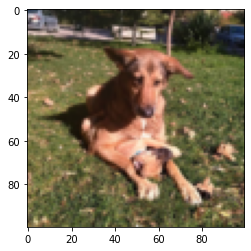

True Label: tensor([1])
Predicted Label: tensor([1], device='cuda:0')


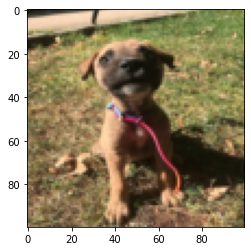

True Label: tensor([1])
Predicted Label: tensor([1], device='cuda:0')


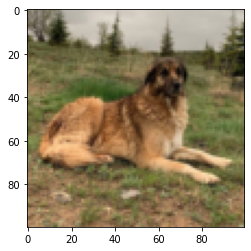

True Label: tensor([1])
Predicted Label: tensor([0], device='cuda:0')
Test accuracy after training: 80.00%


0.8

In [5]:
test_accuracy = check_accuracy(ct, test_dataloader)
print(f'Test accuracy after training: {test_accuracy * 100 :.2f}%')
test_accuracy

## Briefly comment on the results (2-3 sentences max.)

 If the image focuses on the posture of the animal, then the model could not decide well whether it is cat or dog. We should train the model with much more posture-focused dataset.
 This comment needs more evidents but with the small dataset we have, what I can comment is limited.
 Thanks for HW 